In [1]:
# Importing necassary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
# Importing data set

data = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Data Cleaning

In [3]:
data.shape

(53940, 11)

In [4]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Dropping unwanted columns

data = data.drop(['Unnamed: 0'], axis=1)

In [6]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
# renaming x,y,z columns

data = data.rename({'x' :'length(mm)', 'y':'width(mm)', 'z': 'depth(mm)'}, axis=1)

In [8]:
data

,carat,cut,color,clarity,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Data Preprocessing

In [9]:
# segmenting data into categorical and numerical

In [10]:
categorical_df = data.select_dtypes(include= object)

In [11]:
categorical_df.head(2)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1


In [12]:
numerical_df = data.select_dtypes(include= np.number)

In [13]:
numerical_df.head(2)

,carat,depth,table,price,length(mm),width(mm),depth(mm)
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


In [14]:
# creating dummies for categorical features
## The categorical features are Ordinal.

In [15]:
categorical_df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
categorical_df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
categorical_df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [18]:
categorical_df['cut'] = categorical_df['cut'].replace({'Fair': 1, 'Good': 2, 'Ideal': 3, 'Very Good': 4, 'Premium': 5})

In [19]:
categorical_df['color'] = categorical_df['color'].replace({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})

In [20]:
categorical_df['clarity'] = categorical_df['clarity'].replace({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})

In [21]:
categorical_df

,cut,color,clarity
0,3,6,2
1,5,6,3
2,2,6,5
3,5,2,4
4,2,1,2
...,...,...,...
53935,3,7,3
53936,2,7,3
53937,4,7,3
53938,5,3,2


In [22]:
full_data = pd.concat([numerical_df,categorical_df], axis=1)
full_data

,carat,depth,table,price,length(mm),width(mm),depth(mm),cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,3,6,2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,5,6,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,334,4.20,4.23,2.63,5,2,4
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,2
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,3,7,3
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,7,3
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,5,3,2


In [23]:
full_data.pivot_table(index=['carat', 'depth', 'price'], aggfunc='size')

carat  depth  price
0.20   59.0   367      1
       59.7   367      2
       59.8   367      1
       60.2   345      1
       61.1   367      1
                      ..
4.01   61.0   15223    1
       62.5   15223    1
4.13   64.8   17329    1
4.50   65.8   18531    1
5.01   65.5   18018    1
Length: 48814, dtype: int64

### Creating Machine Model

In [24]:
# X-y split (y is the target variable, which is the price)

# X Y SPLIT

X=full_data.drop('price', axis=1)
y=full_data.price

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'length(mm)'}>,
        <AxesSubplot:title={'center':'width(mm)'}>,
        <AxesSubplot:title={'center':'depth(mm)'}>],
       [<AxesSubplot:title={'center':'cut'}>,
        <AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'clarity'}>]], dtype=object)

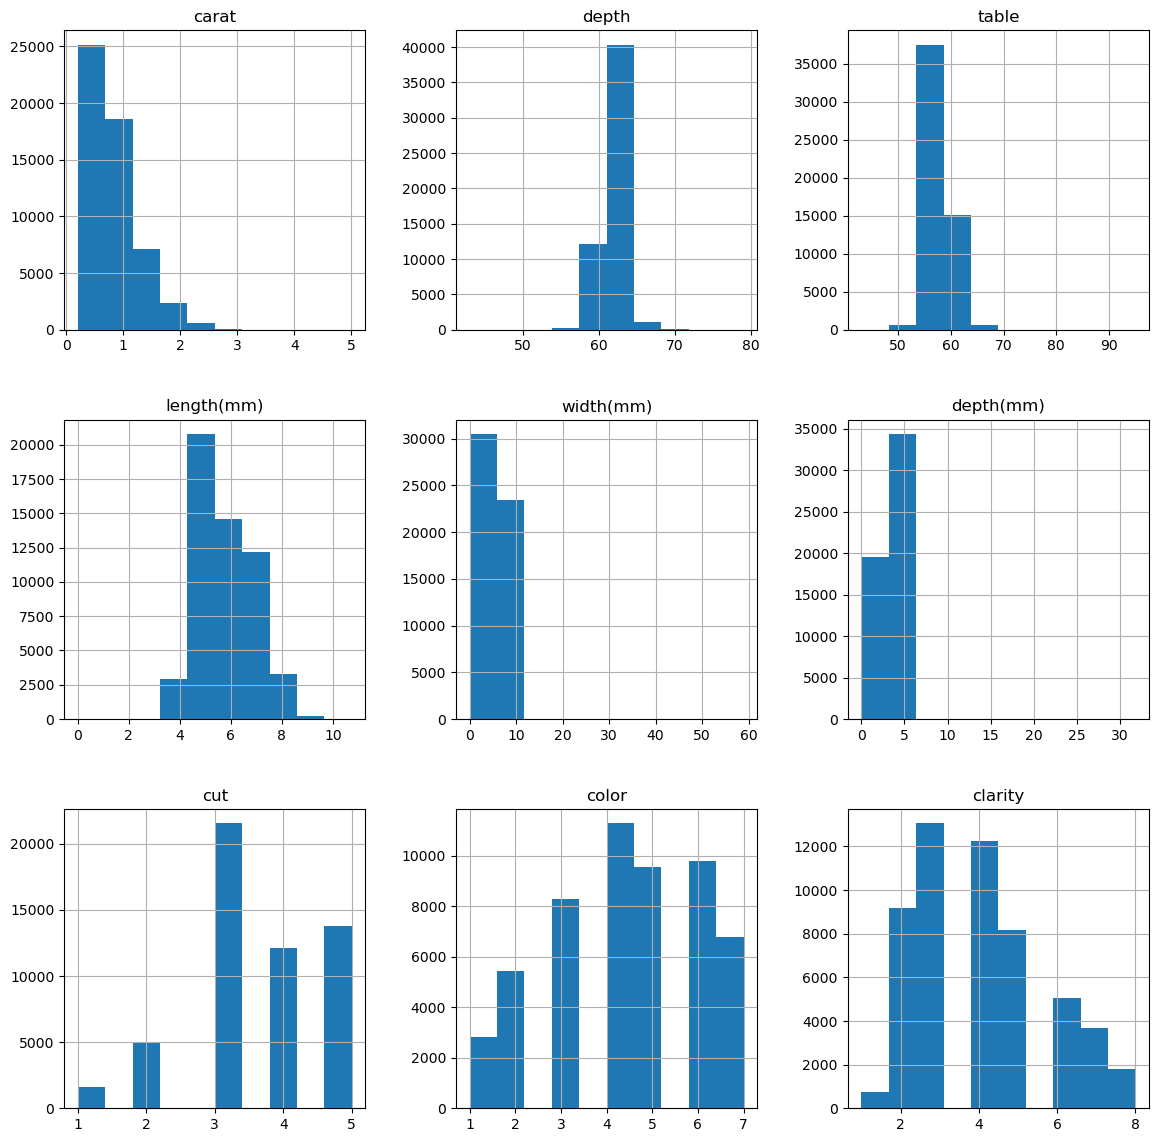

In [25]:
## histogram Visualization of the Variable(input) features.
X.hist(figsize=(14,14))

In [26]:
# Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=123)

In [27]:
# Standardize the data (after the data split)
# standardization

In [28]:
std_scaler = StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)

In [29]:
X_test_scaled=std_scaler.transform(X_test)

In [30]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.94629829  0.38259752 -1.10171075 ... -0.55112321  0.3477777
  -0.02792659]
 [-0.96739915 -0.17821673 -0.20556972 ... -0.55112321 -0.2397916
  -0.02792659]
 [-0.41877696 -0.24831851 -1.99785178 ... -0.55112321  1.5229163
  -0.02792659]
 ...
 [-1.05180256  0.24239396 -1.10171075 ... -0.55112321  0.935347
  -0.02792659]
 [ 0.42525717  0.80320821 -0.20556972 ... -0.55112321 -0.2397916
   0.58013051]
 [-0.18666757  1.08361534 -0.20556972 ...  0.394531   -1.4149302
   1.79624471]]
--------
[[-1.03070171  0.87330999 -0.20556972 ...  1.34018521 -0.2397916
   0.58013051]
 [-0.71418891 -0.3184203  -1.10171075 ... -0.55112321  0.935347
  -1.24404078]
 [ 0.86837509  0.4526993   0.24250079 ...  0.394531   -0.8273609
  -0.63598369]
 ...
 [-0.62978549 -0.87923455  1.13864182 ...  1.34018521  0.935347
  -0.02792659]
 [-1.05180256 -0.24831851  0.6905713  ...  1.34018521 -0.8273609
   0.58013051]
 [ 0.44635803  0.31249574 -1.54978127 ... -0.55112321  0.3477777
  -1.85209788]]


In [31]:
#Predictive Modelling
## Apply linear regression.
## Modeling using statsmodel

X_train_scaled_cons = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_scaled_cons).fit()
predictions_train = model.predict(X_train_scaled_cons) 

X_test_scaled_cons = sm.add_constant(X_test_scaled) # adding a constant

predictions_test = model.predict(X_test_scaled_cons) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.382e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:23   Log-Likelihood:            -3.4483e+05
No. Observations:               40455   AIC:                         6.897e+05
Df Residuals:                   40445   BIC:                         6.898e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3938.2448      6.056    650.254      0.0

In [32]:
X.columns

Index(['carat', 'depth', 'table', 'length(mm)', 'width(mm)', 'depth(mm)',
       'cut', 'color', 'clarity'],
      dtype='object')

In [33]:
#display adjusted R-squared
print(model.rsquared_adj)

0.9069694988772534


### Evaluating Model Performance

In [34]:
predictions_test

array([ 287.24454634,  568.1760872 , 6371.40883191, ..., 1864.86780686,
       -124.96979983, 4373.94335709])

In [35]:
result=pd.DataFrame({"y_test": list(y_test),"y_pred": list(predictions_test)})
result

,y_test,y_pred
0,802,287.244546
1,935,568.176087
2,5826,6371.408832
3,935,1043.108223
4,2817,3504.324101
...,...,...
13480,6149,7481.136603
13481,627,975.649349
13482,1581,1864.867807
13483,675,-124.969800


<AxesSubplot:ylabel='price'>

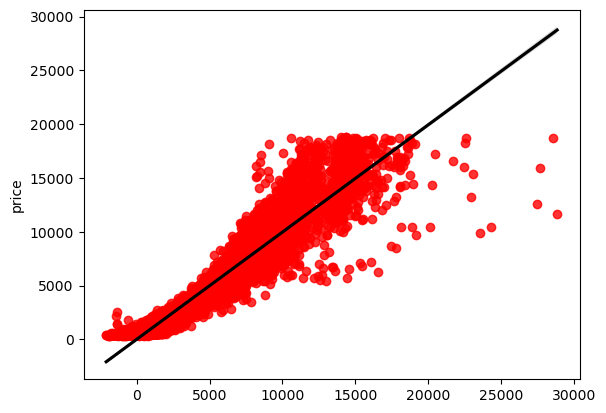

In [36]:
#Visualizing the y test and y pred
import seaborn as sns

sns.regplot(x=predictions_test,y=y_test,scatter_kws={"color": "red"}, line_kws={"color": "black"})

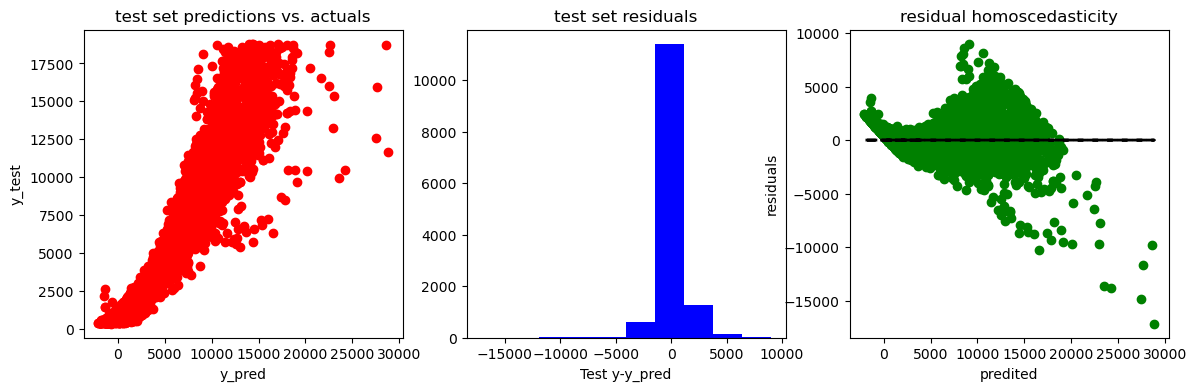

In [37]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

# forms a line?
ax[0].plot(predictions_test, y_test, 'o', color='red')
ax[0].set_xlabel("y_pred")
ax[0].set_ylabel("y_test")
ax[0].set_title("test set predictions vs. actuals")

# normal distribution?
ax[1].hist(y_test - predictions_test, color='blue')
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("test set residuals")

# constant?
ax[2].plot(predictions_test,y_test - predictions_test,"o", color='green')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("residual homoscedasticity")
ax[2].plot(predictions_test,np.zeros(len(predictions_test)),linestyle='dashed', color='black',linewidth=2)

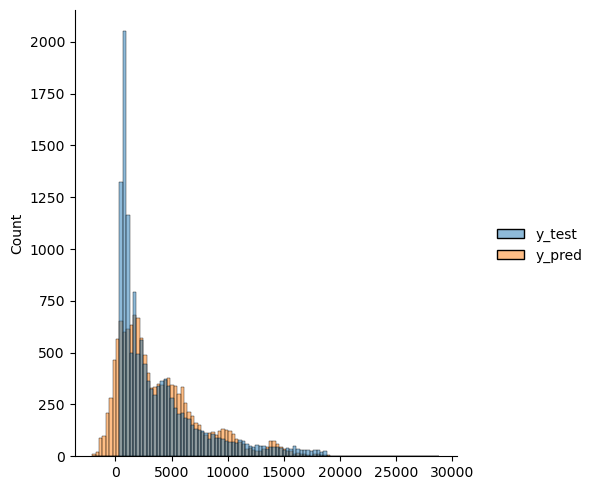

In [38]:
sns.displot(result)

<AxesSubplot:ylabel='Count'>

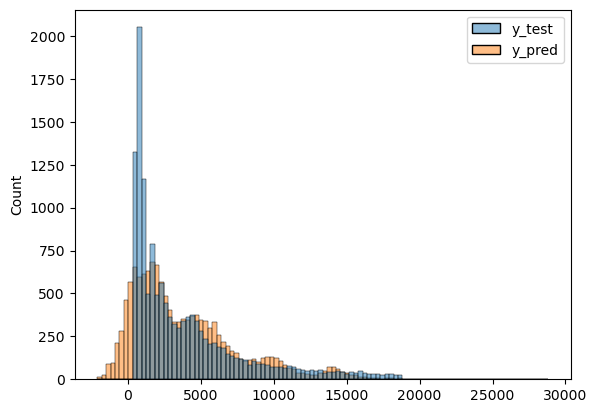

In [39]:
sns.histplot(result)